In [27]:
import os
import pickle as pickle
import tensorflow as tf
import numpy as np
from Simulation import buffer_simulation, save_obj, load_obj
import pandas as pd
from datetime import datetime
from pandas import ExcelWriter
from openpyxl import Workbook
from openpyxl import load_workbook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import preprocessing
import matplotlib.ticker as ticker
from pylab import *
from IPython.display import display,HTML
import cufflinks as cf
import plotly.offline as py

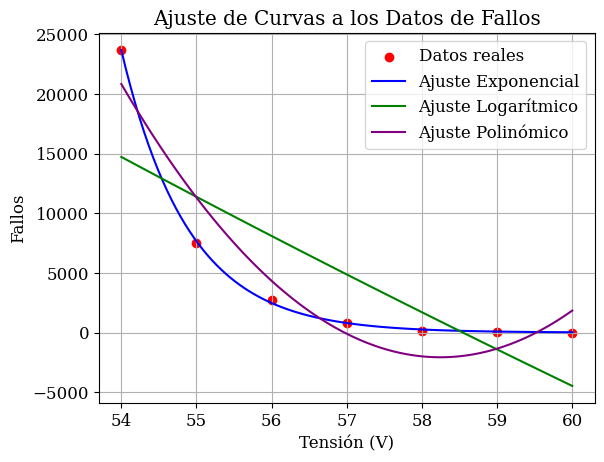

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit



# Datos
voltajes = np.array([60, 59, 58, 57, 56, 55, 54])
fallos = np.array([4, 24, 146, 772, 2732, 7520, 23706])

#voltajes = np.array([1, 2, 3, 4, 5, 6, 7])
#fallos = np.array([4, 24, 146, 772, 2732, 7520, 23706])

# Modelos de ajuste



#def modelo_exponencial(x, a, b):
#    return a * np.exp(b * x)

# Exponencial: y = a * e^(b * x)
def modelo_exponencial(x, a, b):
    return a * np.exp(b * (60 - x))  # Asumimos que el comportamiento es inverso

# Logarítmico: y = a * ln(x) + b
def modelo_logaritmico(x, a, b):
    return a * np.log(x) + b

# Polinómico de grado 2: y = a * x^2 + b * x + c
def modelo_polinomico(x, a, b, c):
    return a * x**2 + b * x + c

# Ajuste de la curva exponencial
parametros_exp, _ = curve_fit(modelo_exponencial, voltajes, fallos)

# Ajuste de la curva logarítmica
parametros_log, _ = curve_fit(modelo_logaritmico, voltajes, fallos)

# Ajuste de la curva polinómica
parametros_poly, _ = curve_fit(modelo_polinomico, voltajes, fallos)

# Crear una secuencia de voltajes para graficar
voltajes_grafica = np.linspace(54, 60, 100)
#voltajes_grafica = np.linspace(1, 7, 100)

# Graficar los datos
plt.scatter(voltajes, fallos, color='red', label='Datos reales')

# Graficar las curvas ajustadas
plt.plot(voltajes_grafica, modelo_exponencial(voltajes_grafica, *parametros_exp), label='Ajuste Exponencial', color='blue')
plt.plot(voltajes_grafica, modelo_logaritmico(voltajes_grafica, *parametros_log), label='Ajuste Logarítmico', color='green')
plt.plot(voltajes_grafica, modelo_polinomico(voltajes_grafica, *parametros_poly), label='Ajuste Polinómico', color='purple')

# Configurar gráficos
plt.xlabel('Tensión (V)')
plt.ylabel('Fallos')
plt.title('Ajuste de Curvas a los Datos de Fallos')
plt.legend()
plt.grid(True)
plt.savefig('obteniendo_modelo_ajuste.pdf', transparent = True, bbox_inches = 'tight', pad_inches = 0)


# Mostrar gráfico
plt.show()

# Imprimir los parámetros de ajuste para cada modelo
#print(f"Parámetros del modelo exponencial (a, b): {parametros_exp}")
#print(f"Parámetros del modelo logarítmico (a, b): {parametros_log}")
#print(f"Parámetros del modelo polinómico (a, b, c): {parametros_poly}")



#### La línea verde de ajuste logarítmico aparece como una línea casi recta debido a las características de la función logarítmica y los datos que estás utilizando. 

    Intervalo de voltajes reducido: La función logarítmica crece lentamente y es sensible al rango de los valores de entrada. En este caso, los valores de voltajes (0.54-0.60) no varían significativamente, lo que hace que el comportamiento logarítmico parezca lineal en ese intervalo.

    Magnitud de los datos de fallos: Los valores de fallos (que crecen exponencialmente) tienen un rango muy amplio en comparación con los voltajes. Esto puede hacer que la curva logarítmica no capture adecuadamente la relación entre voltajes y fallos.

    Ajuste no adecuado: El modelo logarítmico propuesto, y = a * ln(x) + b, no representa bien la relación no lineal entre los voltajes y los fallos, ya que esta relación parece más ajustarse a un modelo exponencial o polinómico.

C:\Users\usuario\AppData\Local\Temp\ipykernel_16072\328835030.py:17: RuntimeWarning: divide by zero encountered in log
  return a * np.log(60 - x) + b  # Relación inversa


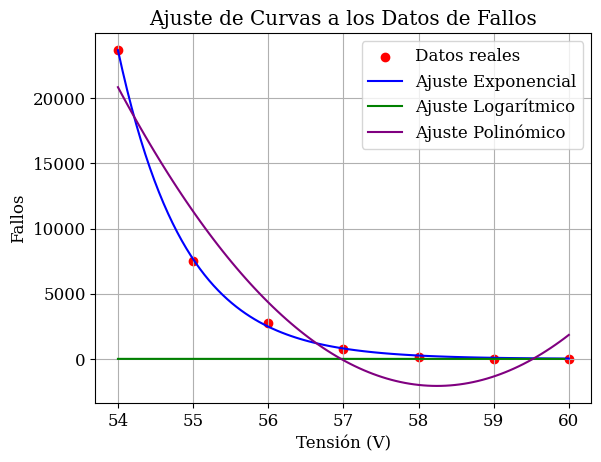

Parámetros del modelo exponencial (a, b): [27.04998104  1.12915754]
Parámetros del modelo logarítmico (a, b): [1. 1.]
Parámetros del modelo polinómico (a, b, c): [ 1271.76190384 -4463.28571154  1843.23810947]
La ecuación exponencial ajustada es: y = 27.0500 * e^(1.1292 * (60 - x))


In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos
voltajes = np.array([60, 59, 58, 57, 56, 55, 54])
fallos = np.array([4, 24, 146, 772, 2732, 7520, 23706])

# Modelos de ajuste

# Exponencial: y = a * e^(b * (60 - x))
def modelo_exponencial(x, a, b):
    return a * np.exp(b * (60 - x))  # Relación inversa

# Logarítmico: y = a * ln(60 - x) + b
def modelo_logaritmico(x, a, b):
    return a * np.log(60 - x) + b  # Relación inversa

# Polinómico de grado 2: y = a * (60 - x)^2 + b * (60 - x) + c
def modelo_polinomico(x, a, b, c):
    return a * (60 - x)**2 + b * (60 - x) + c  # Relación inversa

# Ajuste de la curva exponencial
parametros_exp, _ = curve_fit(modelo_exponencial, voltajes, fallos)

# Ajuste de la curva logarítmica
parametros_log, _ = curve_fit(modelo_logaritmico, voltajes, fallos)

# Ajuste de la curva polinómica
parametros_poly, _ = curve_fit(modelo_polinomico, voltajes, fallos)

# Crear una secuencia de voltajes para graficar
voltajes_grafica = np.linspace(54, 60, 100)

# Graficar los datos
plt.scatter(voltajes, fallos, color='red', label='Datos reales')

# Graficar las curvas ajustadas
plt.plot(voltajes_grafica, modelo_exponencial(voltajes_grafica, *parametros_exp), label='Ajuste Exponencial', color='blue')
plt.plot(voltajes_grafica, modelo_logaritmico(voltajes_grafica, *parametros_log), label='Ajuste Logarítmico', color='green')
plt.plot(voltajes_grafica, modelo_polinomico(voltajes_grafica, *parametros_poly), label='Ajuste Polinómico', color='purple')

# Configurar gráficos
plt.xlabel('Tensión (V)')
plt.ylabel('Fallos')
plt.title('Ajuste de Curvas a los Datos de Fallos')
plt.legend()
plt.grid(True)

plt.savefig('obteniendo_modelo_ajuste.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

# Mostrar gráfico
plt.show()

# Imprimir los parámetros de ajuste para cada modelo
print(f"Parámetros del modelo exponencial (a, b): {parametros_exp}")
print(f"Parámetros del modelo logarítmico (a, b): {parametros_log}")
print(f"Parámetros del modelo polinómico (a, b, c): {parametros_poly}")
# Imprimir la función exponencial con los parámetros ajustados
a_fit, b_fit = parametros_exp  # Desempaquetar los parámetros

# Mostrar la ecuación ajustada
print(f"La ecuación exponencial ajustada es: y = {a_fit:.4f} * e^({b_fit:.4f} * (60 - x))")

# Grafica al documento Tesis

C:\Users\usuario\AppData\Local\Temp\ipykernel_16072\1531990522.py:43: RuntimeWarning: divide by zero encountered in log
  return a * np.log(0.60-x) + b


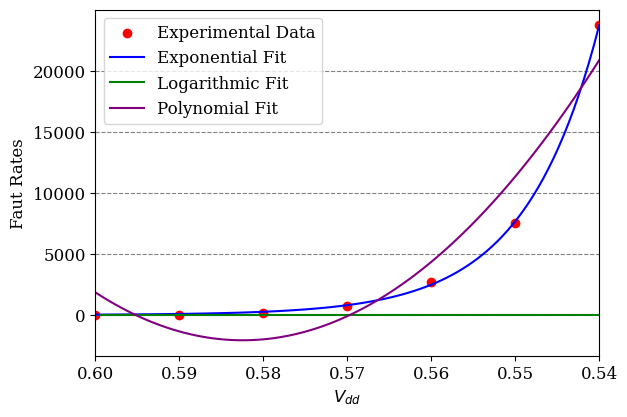

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams['font.size'] = 12  # Tamaño de letra
plt.rcParams['font.family'] = 'serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif


fig1, ax1 = plt.subplots(figsize=(6.5,4.5))

## Exponencial: y = a * e^(b * (60 - x))
#def modelo_exponencial(x, a, b):
#    return a * np.exp(b * (60 - x))  # Relación inversa
#
## Logarítmico: y = a * ln(60 - x) + b
#def modelo_logaritmico(x, a, b):
#    return a * np.log(60 - x) + b  # Relación inversa
#
## Polinómico de grado 2: y = a * (60 - x)^2 + b * (60 - x) + c
#def modelo_polinomico(x, a, b, c):
#    return a * (60 - x)**2 + b * (60 - x) + c  # Relación inversa



# Datos
voltajes = np.array([0.60, 0.59, 0.58, 0.57, 0.56, 0.55, 0.54])
fallos = np.array([4, 24, 146, 772, 2732, 7520, 23706])
#voltajes = np.array([0.60, 0.59, 0.58, 0.57, 0.56, 0.55, 0.54,0.53,0.52,0.51])
#fallos = np.array([4, 24, 146, 772, 2732, 7520, 23706,153573,652020,2768264])

#voltajes = voltajes[::-1]
#fallos = fallos[::-1]

# Modelos de ajuste

# Exponencial: y = a * e^(b * x)
def modelo_exponencial(x, a, b):
    return a * np.exp(b * (0.60 - x))  # Asumimos que el comportamiento es inverso

# Logarítmico: y = a * ln(x) + b
def modelo_logaritmico(x, a, b):
    return a * np.log(0.60-x) + b

# Polinómico de grado 2: y = a * x^2 + b * x + c
def modelo_polinomico(x, a, b, c):
    return a * (0.60-x)**2 + b * (0.6-x )+ c

# Transformar fallos a logaritmo para mejorar el ajuste
log_fallos = np.log(fallos)

# Ajuste de la curva exponencial
#parametros_exp, _ = curve_fit(modelo_exponencial, voltajes, log_fallos)
parametros_exp, _ = curve_fit(modelo_exponencial, voltajes, fallos)

# Ajuste de la curva logarítmica
#parametros_log, _ = curve_fit(modelo_logaritmico, voltajes, log_fallos)
parametros_log, _ = curve_fit(modelo_logaritmico, voltajes, fallos)

# Ajuste de la curva polinómica
#parametros_poly, _ = curve_fit(modelo_polinomico, voltajes, log_fallos)
parametros_poly, _ = curve_fit(modelo_polinomico, voltajes, fallos)

# Crear una secuencia de voltajes para graficar
voltajes_grafica = np.linspace(0.54, 0.60, 100)

# Graficar los datos
plt.scatter(voltajes, fallos, color='red', label='Experimental Data')

# Graficar las curvas ajustadas
ax1.plot(voltajes_grafica, modelo_exponencial(voltajes_grafica, *parametros_exp), label='Exponential Fit', color='blue')
ax1.plot(voltajes_grafica, modelo_logaritmico(voltajes_grafica, *parametros_log), label='Logarithmic Fit', color='green')
ax1.plot(voltajes_grafica, modelo_polinomico(voltajes_grafica, *parametros_poly), label='Polynomial Fit', color='purple')


# Usar escala logarítmica para el eje Y
#plt.yscale('log')

# Configurar límites y pasos del eje Y
#plt.ylim(1, 3e6)  # Ajuste de los límites Y (hasta 3 millones)
#plt.yticks([1, 10, 100, 1000, 10000, 100000, 1000000, 3000000], labels=['1', '10', '100', '1k', '10k', '100k', '1M', '3M'])
# Configurar gráficos en inglés
#plt.xlabel('Supply Voltage (V)')
plt.ylabel('Faut Rates')
#plt.title('Curve Fitting to Fault Data')
plt.legend()
ax1.yaxis.grid(color='gray', linestyle='dashed')
ax1.set_xlabel("$V_{dd}$")
#plt.grid(True)
#plt.xlim(0.60, 0.51)
plt.xlim(0.60, 0.54)
#plt.ylim(0, 25000)
plt.savefig('obtaining_model_fit_ok.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

# Mostrar gráfico
plt.show()

# Imprimir los parámetros de ajuste para cada modelo
#print(f"Exponential Model Parameters (a, b): {parametros_exp}")
#print(f"Logarithmic Model Parameters (a, b): {parametros_log}")
#print(f"Polynomial Model Parameters (a, b, c): {parametros_poly}")

# Extrapolación

C:\Users\usuario\AppData\Local\Temp\ipykernel_16072\1830775947.py:43: RuntimeWarning: divide by zero encountered in log
  return a * np.log(0.60-x) + b


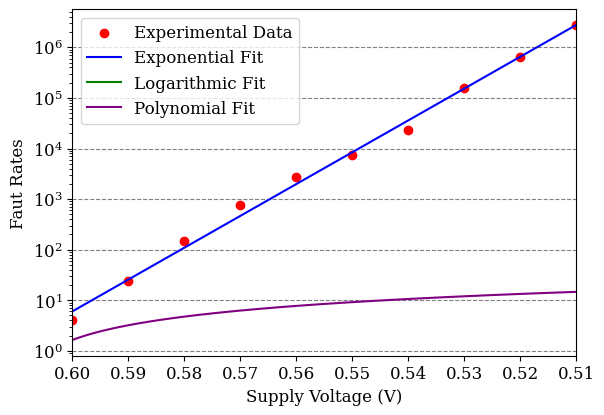

In [106]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams['font.size'] = 12  # Tamaño de letra
plt.rcParams['font.family'] = 'serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif


fig1, ax1 = plt.subplots(figsize=(6.5,4.5))

## Exponencial: y = a * e^(b * (60 - x))
#def modelo_exponencial(x, a, b):
#    return a * np.exp(b * (60 - x))  # Relación inversa
#
## Logarítmico: y = a * ln(60 - x) + b
#def modelo_logaritmico(x, a, b):
#    return a * np.log(60 - x) + b  # Relación inversa
#
## Polinómico de grado 2: y = a * (60 - x)^2 + b * (60 - x) + c
#def modelo_polinomico(x, a, b, c):
#    return a * (60 - x)**2 + b * (60 - x) + c  # Relación inversa



# Datos
#voltajes = np.array([0.60, 0.59, 0.58, 0.57, 0.56, 0.55, 0.54])
#fallos = np.array([4, 24, 146, 772, 2732, 7520, 23706])
voltajes = np.array([0.60, 0.59, 0.58, 0.57, 0.56, 0.55, 0.54,0.53,0.52,0.51])
fallos = np.array([4, 24, 146, 772, 2732, 7520, 23706,153573,652020,2768264])

#voltajes = voltajes[::-1]
#fallos = fallos[::-1]

# Modelos de ajuste

# Exponencial: y = a * e^(b * x)
def modelo_exponencial(x, a, b):
    return a * np.exp(b * (0.60 - x))  # Asumimos que el comportamiento es inverso

# Logarítmico: y = a * ln(x) + b
def modelo_logaritmico(x, a, b):
    return a * np.log(0.60-x) + b

# Polinómico de grado 2: y = a * x^2 + b * x + c
def modelo_polinomico(x, a, b, c):
    return a * (0.60-x)**2 + b * (0.6-x )+ c

# Transformar fallos a logaritmo para mejorar el ajuste
log_fallos = np.log(fallos)

# Ajuste de la curva exponencial
#parametros_exp, _ = curve_fit(modelo_exponencial, voltajes, log_fallos)
parametros_exp, _ = curve_fit(modelo_exponencial, voltajes, fallos)

# Ajuste de la curva logarítmica
#parametros_log, _ = curve_fit(modelo_logaritmico, voltajes, log_fallos)
parametros_log, _ = curve_fit(modelo_logaritmico, voltajes, fallos)

# Ajuste de la curva polinómica
parametros_poly, _ = curve_fit(modelo_polinomico, voltajes, log_fallos)
#parametros_poly, _ = curve_fit(modelo_polinomico, voltajes, fallos)

# Crear una secuencia de voltajes para graficar
voltajes_grafica = np.linspace(0.51, 0.60, 100)

# Graficar los datos
plt.scatter(voltajes, fallos, color='red', label='Experimental Data')

# Graficar las curvas ajustadas
ax1.plot(voltajes_grafica, modelo_exponencial(voltajes_grafica, *parametros_exp), label='Exponential Fit', color='blue')
ax1.plot(voltajes_grafica, modelo_logaritmico(voltajes_grafica, *parametros_log), label='Logarithmic Fit', color='green')
ax1.plot(voltajes_grafica, modelo_polinomico(voltajes_grafica, *parametros_poly), label='Polynomial Fit', color='purple')


# Usar escala logarítmica para el eje Y
plt.yscale('log')

# Configurar límites y pasos del eje Y
#plt.ylim(1, 3e6)  # Ajuste de los límites Y (hasta 3 millones)
#plt.yticks([1, 10, 100, 1000, 10000, 100000, 1000000, 3000000], labels=['1', '10', '100', '1k', '10k', '100k', '1M', '3M'])
# Configurar gráficos en inglés
plt.xlabel('Supply Voltage (V)')
plt.ylabel('Faut Rates')
#plt.title('Curve Fitting to Fault Data')
plt.legend()
ax1.yaxis.grid(color='gray', linestyle='dashed')
#plt.grid(True)
plt.xlim(0.60, 0.51)
#plt.xlim(0.60, 0.54)
plt.savefig('obtaining_model_fit.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

# Mostrar gráfico
plt.show()

# Imprimir los parámetros de ajuste para cada modelo
#print(f"Exponential Model Parameters (a, b): {parametros_exp}")
#print(f"Logarithmic Model Parameters (a, b): {parametros_log}")
#print(f"Polynomial Model Parameters (a, b, c): {parametros_poly}")

## esta  ok

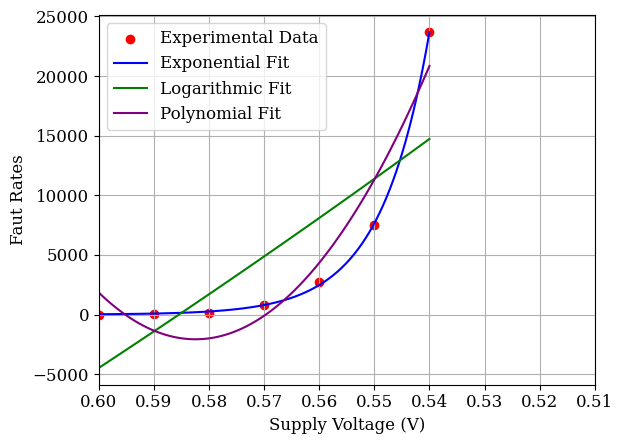

Exponential Model Parameters (a, b): [ 27.04998149 112.91575384]
Logarithmic Model Parameters (a, b): [-182288.28828655  -97593.74270651]
Polynomial Model Parameters (a, b, c): [ 12717599.46254835 -14814791.95677013   4312382.59590628]


In [30]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams['font.size'] = 12  # Tamaño de letra
plt.rcParams['font.family'] = 'serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif


# Datos
voltajes = np.array([0.60, 0.59, 0.58, 0.57, 0.56, 0.55, 0.54])
fallos = np.array([4, 24, 146, 772, 2732, 7520, 23706])

#voltajes = voltajes[::-1]
#fallos = fallos[::-1]

# Modelos de ajuste


# Exponencial: y = a * e^(b * x)
def modelo_exponencial(x, a, b):
    return a * np.exp(b * (0.60 - x))  # Asumimos que el comportamiento es inverso

# Logarítmico: y = a * ln(x) + b
def modelo_logaritmico(x, a, b):
    return a * np.log(x) + b

# Polinómico de grado 2: y = a * x^2 + b * x + c
def modelo_polinomico(x, a, b, c):
    return a * x**2 + b * x + c

# Ajuste de la curva exponencial
parametros_exp, _ = curve_fit(modelo_exponencial, voltajes, fallos)

# Ajuste de la curva logarítmica
parametros_log, _ = curve_fit(modelo_logaritmico, voltajes, fallos)

# Ajuste de la curva polinómica
parametros_poly, _ = curve_fit(modelo_polinomico, voltajes, fallos)

# Crear una secuencia de voltajes para graficar
voltajes_grafica = np.linspace(0.54, 0.60, 100)

# Graficar los datos
plt.scatter(voltajes, fallos, color='red', label='Experimental Data')

# Graficar las curvas ajustadas
plt.plot(voltajes_grafica, modelo_exponencial(voltajes_grafica, *parametros_exp), label='Exponential Fit', color='blue')
plt.plot(voltajes_grafica, modelo_logaritmico(voltajes_grafica, *parametros_log), label='Logarithmic Fit', color='green')
plt.plot(voltajes_grafica, modelo_polinomico(voltajes_grafica, *parametros_poly), label='Polynomial Fit', color='purple')

# Configurar gráficos en inglés
plt.xlabel('Supply Voltage (V)')
plt.ylabel('Faut Rates')
#plt.title('Curve Fitting to Fault Data')
plt.legend()
plt.grid(True)
# Ajustar el rango y la dirección del eje X
plt.xlim(0.60, 0.51)  # Extendido hasta 0.51 para mostrar extrapolación

plt.savefig('obtaining_model_fit.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

# Mostrar gráfico
plt.show()

# Imprimir los parámetros de ajuste para cada modelo
print(f"Exponential Model Parameters (a, b): {parametros_exp}")
print(f"Logarithmic Model Parameters (a, b): {parametros_log}")
print(f"Polynomial Model Parameters (a, b, c): {parametros_poly}")

Extrapolated Values:
Voltage: 0.53 V -> Exponential: 73261.40, Logarithmic: 18137.13, Polynomial: 32916.55
Voltage: 0.52 V -> Exponential: 226601.13, Logarithmic: 21609.39, Polynomial: 47529.67
Voltage: 0.51 V -> Exponential: 700888.55, Logarithmic: 25149.08, Polynomial: 64686.32


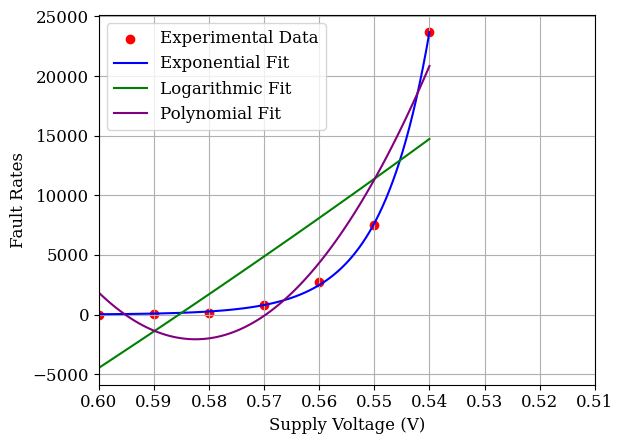

Exponential Model Parameters (a, b): [ 27.04998149 112.91575384]
Logarithmic Model Parameters (a, b): [-182288.28828655  -97593.74270651]
Polynomial Model Parameters (a, b, c): [ 12717599.46254835 -14814791.95677013   4312382.59590628]


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams['font.size'] = 12  # Tamaño de letra
plt.rcParams['font.family'] = 'serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif

# Datos
voltajes = np.array([0.60, 0.59, 0.58, 0.57, 0.56, 0.55, 0.54])
fallos = np.array([4, 24, 146, 772, 2732, 7520, 23706])

# Modelos de ajuste

# Exponencial: y = a * e^(b * x)
def modelo_exponencial(x, a, b):
    return a * np.exp(b * (0.60 - x))  # Asumimos que el comportamiento es inverso

# Logarítmico: y = a * ln(x) + b
def modelo_logaritmico(x, a, b):
    return a * np.log(x) + b

# Polinómico de grado 2: y = a * x^2 + b * x + c
def modelo_polinomico(x, a, b, c):
    return a * x**2 + b * x + c

# Ajuste de la curva exponencial
parametros_exp, _ = curve_fit(modelo_exponencial, voltajes, fallos)

# Ajuste de la curva logarítmica
parametros_log, _ = curve_fit(modelo_logaritmico, voltajes, fallos)

# Ajuste de la curva polinómica
parametros_poly, _ = curve_fit(modelo_polinomico, voltajes, fallos)

# Crear una secuencia de voltajes para graficar
voltajes_grafica = np.linspace(0.54, 0.60, 100)

# Calcular valores extrapolados para 0.53, 0.52, y 0.51
voltajes_extrapolados = np.array([0.53, 0.52, 0.51])
fallos_exp = modelo_exponencial(voltajes_extrapolados, *parametros_exp)
fallos_log = modelo_logaritmico(voltajes_extrapolados, *parametros_log)
fallos_poly = modelo_polinomico(voltajes_extrapolados, *parametros_poly)

# Mostrar los valores extrapolados
print("Extrapolated Values:")
for v, f_exp, f_log, f_poly in zip(voltajes_extrapolados, fallos_exp, fallos_log, fallos_poly):
    print(f"Voltage: {v:.2f} V -> Exponential: {f_exp:.2f}, Logarithmic: {f_log:.2f}, Polynomial: {f_poly:.2f}")

# Graficar los datos
plt.scatter(voltajes, fallos, color='red', label='Experimental Data')

# Graficar las curvas ajustadas
plt.plot(voltajes_grafica, modelo_exponencial(voltajes_grafica, *parametros_exp), label='Exponential Fit', color='blue')
plt.plot(voltajes_grafica, modelo_logaritmico(voltajes_grafica, *parametros_log), label='Logarithmic Fit', color='green')
plt.plot(voltajes_grafica, modelo_polinomico(voltajes_grafica, *parametros_poly), label='Polynomial Fit', color='purple')

# Configurar gráficos en inglés
plt.xlabel('Supply Voltage (V)')
plt.ylabel('Fault Rates')
#plt.title('Curve Fitting to Fault Data')
plt.legend()
plt.grid(True)

# Ajustar el rango y la dirección del eje X
plt.xlim(0.60, 0.51)  # Extendido hasta 0.51 para mostrar extrapolación

# Guardar gráfico
plt.savefig('obtaining_model_fit.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

# Mostrar gráfico
plt.show()

# Imprimir los parámetros de ajuste para cada modelo
print(f"Exponential Model Parameters (a, b): {parametros_exp}")
print(f"Logarithmic Model Parameters (a, b): {parametros_log}")
print(f"Polynomial Model Parameters (a, b, c): {parametros_poly}")

## Obtener los parametros del modelo exponelcial a y b

Parámetros ajustados: a = 1.4164078909785585, b = 1.4485707145588176


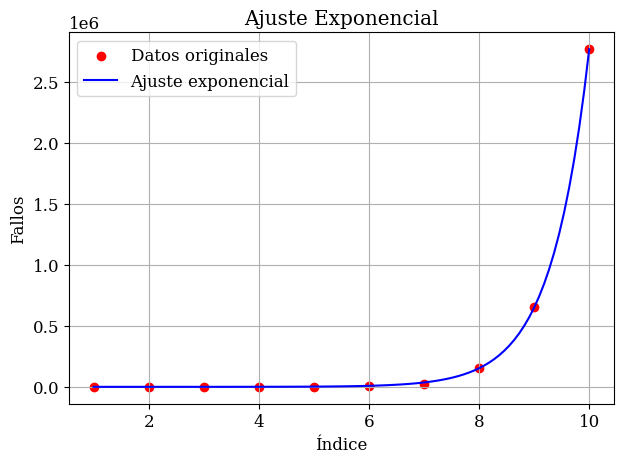

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams['font.size'] = 12  # Tamaño de letra
plt.rcParams['font.family'] = 'serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif

# Datos

x_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_data = np.array([4, 24, 146, 772, 2732, 7520, 23706, 153573, 652020, 2768264])

# Modelo exponencial
def modelo_exponencial(x, a, b):
    return a * np.exp(b * x)

# Ajuste del modelo exponencial
parametros, _ = curve_fit(modelo_exponencial, x_data, y_data)
a_fit, b_fit = parametros

print(f"Parámetros ajustados: a = {a_fit}, b = {b_fit}")

# Crear una secuencia de datos para graficar
x_grafica = np.linspace(1, 10, 100)
y_grafica = modelo_exponencial(x_grafica, a_fit, b_fit)

# Graficar datos y modelo ajustado
plt.scatter(x_data, y_data, color='red', label='Datos originales')
plt.plot(x_grafica, y_grafica, color='blue', label='Ajuste exponencial')

# Configurar el gráfico
plt.xlabel('Índice')
plt.ylabel('Fallos')
plt.legend()
plt.grid(True)
plt.title('Ajuste Exponencial')
plt.tight_layout()

# Guardar la gráfica como PDF
plt.savefig('ajuste_exponencial.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

# Mostrar la gráfica
plt.show()

In [47]:
from scipy.optimize import curve_fit

# Datos originales
x_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y_data = np.array([4, 24, 146, 772, 2732, 7520, 23706, 153573, 652020, 2768264])

# Modelo exponencial
def modelo_exponencial(x, a, b):
    return a * np.exp(b * x)

# Ajustar el modelo a los datos
parametros, _ = curve_fit(modelo_exponencial, x_data, y_data)
a_fit, b_fit = parametros

print(f"Parámetros ajustados: a = {a_fit}, b = {b_fit}")

Parámetros ajustados: a = 1.4164078909785585, b = 1.4485707145588176


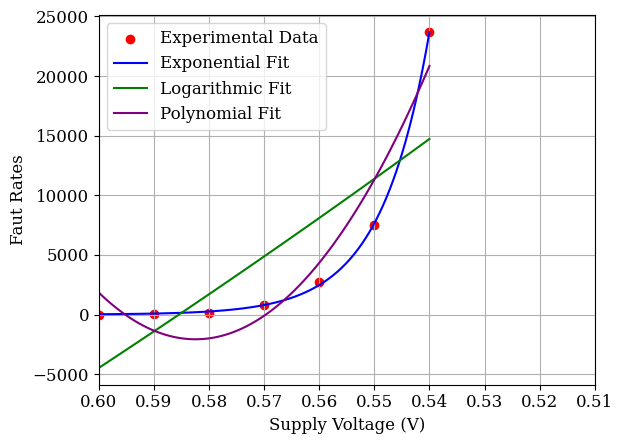

Exponential Model Parameters (a, b): [ 27.04998149 112.91575384]
Logarithmic Model Parameters (a, b): [-182288.28828655  -97593.74270651]
Polynomial Model Parameters (a, b, c): [ 12717599.46254835 -14814791.95677013   4312382.59590628]


In [51]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams['font.size'] = 12  # Tamaño de letra
plt.rcParams['font.family'] = 'serif'  # Tipo de letra
plt.rcParams['font.sans-serif'] = ['Arial']  # Familia de fuentes sans-serif


# Datos
voltajes = np.array([0.60, 0.59, 0.58, 0.57, 0.56, 0.55, 0.54])
fallos = np.array([4, 24, 146, 772, 2732, 7520, 23706])

#voltajes = voltajes[::-1]
#fallos = fallos[::-1]

# Modelos de ajuste


# Exponencial: y = a * e^(b * x)
def modelo_exponencial(x, a, b):
    return a * np.exp(b * (0.60 - x))  # Asumimos que el comportamiento es inverso

# Logarítmico: y = a * ln(x) + b
def modelo_logaritmico(x, a, b):
    return a * np.log(x) + b

# Polinómico de grado 2: y = a * x^2 + b * x + c
def modelo_polinomico(x, a, b, c):
    return a * x**2 + b * x + c

# Ajuste de la curva exponencial
parametros_exp, _ = curve_fit(modelo_exponencial, voltajes, fallos)

# Ajuste de la curva logarítmica
parametros_log, _ = curve_fit(modelo_logaritmico, voltajes, fallos)

# Ajuste de la curva polinómica
parametros_poly, _ = curve_fit(modelo_polinomico, voltajes, fallos)

# Crear una secuencia de voltajes para graficar
voltajes_grafica = np.linspace(0.54, 0.60, 100)

# Graficar los datos
plt.scatter(voltajes, fallos, color='red', label='Experimental Data')

# Graficar las curvas ajustadas
plt.plot(voltajes_grafica, modelo_exponencial(voltajes_grafica, *parametros_exp), label='Exponential Fit', color='blue')
plt.plot(voltajes_grafica, modelo_logaritmico(voltajes_grafica, *parametros_log), label='Logarithmic Fit', color='green')
plt.plot(voltajes_grafica, modelo_polinomico(voltajes_grafica, *parametros_poly), label='Polynomial Fit', color='purple')

# Configurar gráficos en inglés
plt.xlabel('Supply Voltage (V)')
plt.ylabel('Faut Rates')
#plt.title('Curve Fitting to Fault Data')
plt.legend()
plt.grid(True)
# Ajustar el rango y la dirección del eje X
plt.xlim(0.60, 0.51)  # Extendido hasta 0.51 para mostrar extrapolación

plt.savefig('obtaining_model_fit.pdf', transparent=True, bbox_inches='tight', pad_inches=0)

# Mostrar gráfico
plt.show()

# Imprimir los parámetros de ajuste para cada modelo
print(f"Exponential Model Parameters (a, b): {parametros_exp}")
print(f"Logarithmic Model Parameters (a, b): {parametros_log}")
print(f"Polynomial Model Parameters (a, b, c): {parametros_poly}")

## colocar los parametros en la funcion exponencial y extrapolar para tensiones mas bajas

In [22]:
import numpy as np

# Parámetros obtenidos de Excel (a, b)
#a = 1.14546
#b = 1.449



#python
a = 1.4164078909785585
b = 1.4485707145588176


# Función exponencial ajustada
def modelo_exponencial(x, a, b):
    return a * np.exp(b * x)

# Tensiones reales a extrapolar
tensiones_reales = np.array([0.53, 0.52, 0.51])

# Mapear tensiones reales a valores de x_data (tensiones mapeadas)
# La relación es: x = (0.60 - tensión_real) / 0.01 + 1
valores_mapeados = (0.60 - tensiones_reales) / 0.01 + 1
print(valores_mapeados)

# Calcular los valores extrapolados
fallos_extrapolados = modelo_exponencial(valores_mapeados, a, b)

# Mostrar resultados
for tension, fallo in zip(tensiones_reales, fallos_extrapolados):
    print(f"Para tensión {tension:.2f}V, los fallos estimados son {fallo:.2f}")

[ 8.  9. 10.]
Para tensión 0.53V, los fallos estimados son 152770.14
Para tensión 0.52V, los fallos estimados son 650346.41
Para tensión 0.51V, los fallos estimados son 2768541.37


Función ajustada: y = 1.4164e+00 * e^1.4486 * x
Tensión 8: 152770.14 fallos
Tensión 9: 650346.41 fallos
Tensión 10: 2768541.37 fallos


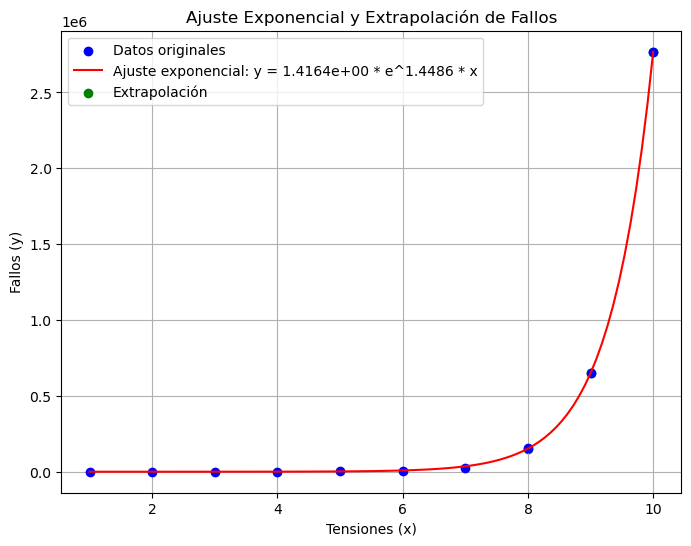

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos de tensiones (x) y fallos (y)
x_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Tensiones mapeadas
y_data = np.array([4, 24, 146, 772, 2732, 7520, 23706, 153573, 652020, 2768264])  # Fallos correspondientes

# Definir la función exponencial de ajuste: y = a * exp(b * x)
def exp_func(x, a, b):
    return a * np.exp(b * x)

# Ajuste de los datos a la función exponencial
params, covariance = curve_fit(exp_func, x_data, y_data)

# Extraemos los parámetros ajustados 'a' y 'b'
a_fit, b_fit = params
print(f"Función ajustada: y = {a_fit:.4e} * e^{b_fit:.4f} * x")

# Graficar los datos originales y la función ajustada
x_range = np.linspace(1, 10, 100)  # Para generar una curva suave
y_fit = exp_func(x_range, a_fit, b_fit)

plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, color='blue', label='Datos originales', zorder=5)
plt.plot(x_range, y_fit, color='red', label=f'Ajuste exponencial: y = {a_fit:.4e} * e^{b_fit:.4f} * x', zorder=5)

# Extrapolar para tensiones menores (valores 8, 9, 10)
x_extrap = np.array([8, 9, 10])  # Tensiones 8, 9, 10 (o valores consecutivos)
y_extrap = exp_func(x_extrap, a_fit, b_fit)  # Extrapolación de fallos

# Imprimir los resultados extrapolados
for tension, fallo in zip(x_extrap, y_extrap):
    print(f"Tensión {tension}: {fallo:.2f} fallos")

# Graficar los puntos extrapolados
plt.scatter(x_extrap, y_extrap, color='green', label='Extrapolación')

# Etiquetas y título
plt.xlabel('Tensiones (x)')
plt.ylabel('Fallos (y)')
plt.title('Ajuste Exponencial y Extrapolación de Fallos')
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()

Función ajustada: y = 1.4164e+00 * e^1.4486 * x
Tensión 8: 152770.14 fallos
Tensión 9: 650346.41 fallos
Tensión 10: 2768541.37 fallos


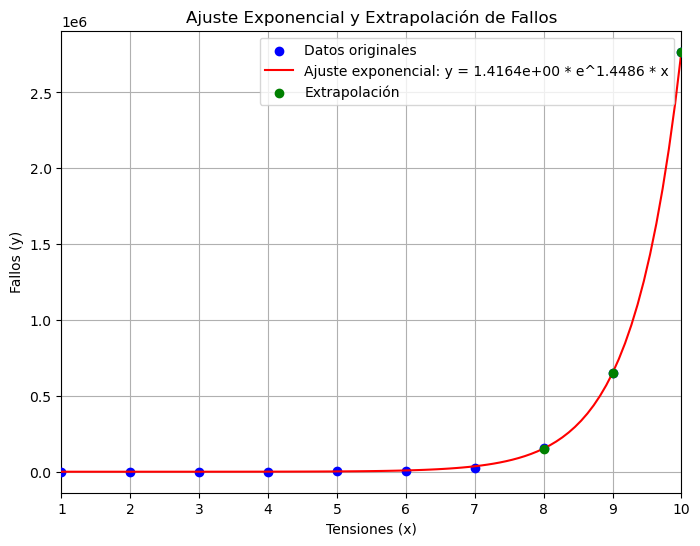

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Datos de tensiones (x) y fallos (y)
x_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Tensiones mapeadas
y_data = np.array([4, 24, 146, 772, 2732, 7520, 23706, 153573, 652020, 2768264])  # Fallos correspondientes

# Definir la función exponencial de ajuste: y = a * exp(b * x)
def exp_func(x, a, b):
    return a * np.exp(b * x)

# Ajuste de los datos a la función exponencial
params, covariance = curve_fit(exp_func, x_data, y_data)

# Extraemos los parámetros ajustados 'a' y 'b'
a_fit, b_fit = params
print(f"Función ajustada: y = {a_fit:.4e} * e^{b_fit:.4f} * x")

# Graficar los datos originales y la función ajustada
x_range = np.linspace(1, 10, 100)  # Para generar una curva suave
y_fit = exp_func(x_range, a_fit, b_fit)

plt.figure(figsize=(8, 6))
plt.scatter(x_data, y_data, color='blue', label='Datos originales', zorder=5)
plt.plot(x_range, y_fit, color='red', label=f'Ajuste exponencial: y = {a_fit:.4e} * e^{b_fit:.4f} * x', zorder=5)

# Extrapolar para tensiones menores (valores 8, 9, 10)
x_extrap = np.array([8, 9, 10])  # Tensiones 8, 9, 10
y_extrap = exp_func(x_extrap, a_fit, b_fit)  # Extrapolación de fallos

# Imprimir los resultados extrapolados
for tension, fallo in zip(x_extrap, y_extrap):
    print(f"Tensión {tension}: {fallo:.2f} fallos")

# Graficar los puntos extrapolados (en verde)
plt.scatter(x_extrap, y_extrap, color='green', label='Extrapolación', zorder=10)

# Ajustar límites del eje x si es necesario
plt.xlim(1, 10)  # Asegúrate de que el rango de tensiones esté bien

# Etiquetas y título
plt.xlabel('Tensiones (x)')
plt.ylabel('Fallos (y)')
plt.title('Ajuste Exponencial y Extrapolación de Fallos')
plt.legend()
plt.grid(True)

# Mostrar gráfico
plt.show()

# rectificando la extrapolación

In [ ]:
mport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.optimize import curve_fit

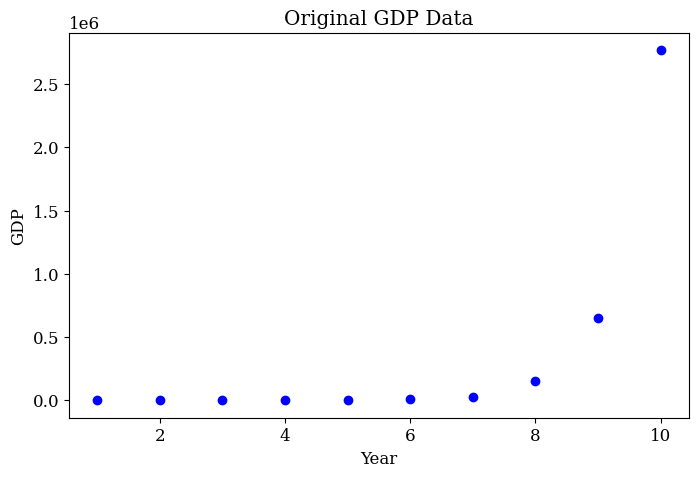

In [145]:
plt.figure(figsize=(8, 5))
#x_data = np.array([1, 2, 3, 4, 5, 6, 7])  # Tensiones mapeadas
#y_data = np.array([4, 24, 146, 772, 2732, 7520, 23706])  # Fallos correspondientes
x_data = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Tensiones mapeadas
y_data = np.array([4, 24, 146, 772, 2732, 7520, 23706, 153573, 652020, 2768264])  # Fallos correspondientes
plt.plot(x_data, y_data, 'bo')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.title('Original GDP Data')
plt.show()

a = 1.4164, b = 1.4486


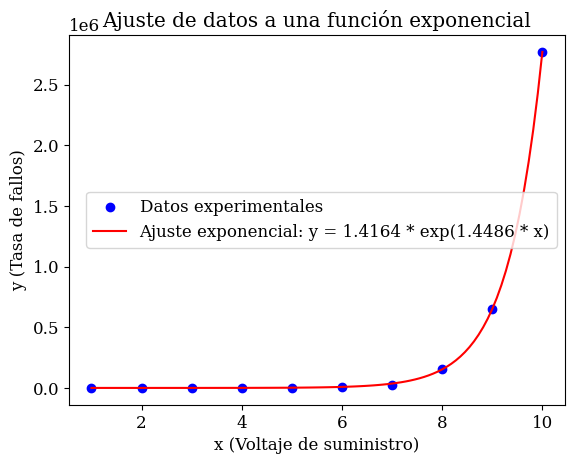

In [146]:
def exp_func(x, a, b):
    return a * np.exp(b * x)

# Ajuste de los datos a la función exponencial
popt, pcov = curve_fit(exp_func, x_data, y_data)
a_opt, b_opt = popt
print(f"a = {a_opt:.4f}, b = {b_opt:.4f}")
x_fit = np.linspace(min(x_data), max(x_data), 100)  # Valores suaves para la curva ajustada
y_fit = exp_func(x_fit, a_opt, b_opt)

plt.scatter(x_data, y_data, label="Datos experimentales", color="blue")
plt.plot(x_fit, y_fit, label=f"Ajuste exponencial: y = {a_opt:.4f} * exp({b_opt:.4f} * x)", color="red")
plt.xlabel("x (Voltaje de suministro)")
plt.ylabel("y (Tasa de fallos)")
plt.title("Ajuste de datos a una función exponencial")
plt.legend()
plt.show()

In [147]:
# Predicción de y a partir de la función ajustada
y_pred = exp_func(x_data, a, b)

# Cálculo del coeficiente de determinación (R^2)
ss_res = np.sum((y_data - y_pred) ** 2)  # Suma de los errores cuadrados residuales
ss_tot = np.sum((y_data - np.mean(y_data)) ** 2)  # Suma total de cuadrados
r_squared = 1 - (ss_res / ss_tot)

print(f"Coeficiente de determinación (R^2): {r_squared}")

Coeficiente de determinación (R^2): 0.999977478578217
